In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\\sanja\\Downloads\\100-days-of-machine-learning-main\\day48-simple-linear-regression\\placement.csv")

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [4]:
df.shape

(200, 2)

<Axes: xlabel='cgpa', ylabel='package'>

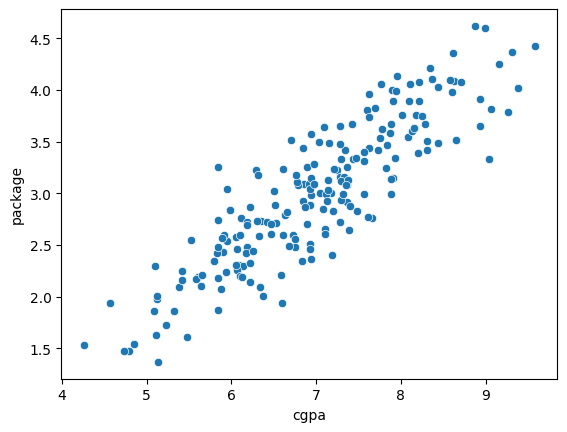

In [5]:
sns.scatterplot(x=df['cgpa'],y=df['package'])

In [6]:
X = df.iloc[:,-1]
y = df.iloc[:,1]

In [9]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y,test_size=0.2,random_state=2)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()

In [14]:
lr.fit(X_train1.reshape(-1,1), y_train1)

AttributeError: 'Series' object has no attribute 'reshape'

In [56]:
lr.predict(x_test1.iloc[0].values.reshape(1,1))

c:\Users\sanja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

In [18]:
y_test1

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64

<Axes: xlabel='cgpa', ylabel='package'>

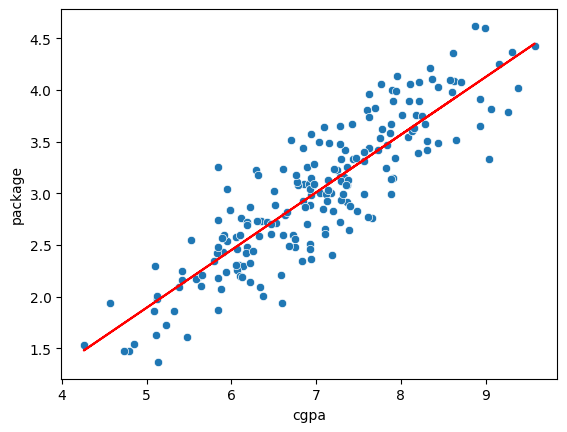

In [65]:
plt.plot(X_train1,lr.predict(x_train1),color='red')
sns.scatterplot(x = df['cgpa'], y = df['package'])

In [24]:
m = lr.coef_
m

array([0.55795197])

In [25]:
c = lr.intercept_
c

-0.8961119222429144

In [49]:
class CalLR:

    def __init__(self):
        self.m = None
        self.b = None

    def fit(self,x_train,y_train):
        
        num = 0
        den = 0

        for i in range(x_train.shape[0]):
            num = num + ((x_train.iloc[i] - x_train.mean()) * (y_train.iloc[i] - y_train.mean()))

            den = den + ((x_train.iloc[i] - x_train.mean())**2)

        self.m = num/den
        self.b = y_train.mean() - (self.m * x_train.mean())

    def pred(self,x_test):
            
         return self.m * x_test + self.b


In [35]:
x_train1.iloc[0]

cgpa    7.14
Name: 137, dtype: float64

In [50]:
lr = CalLR()

In [51]:
lr.fit(x_train1, y_train1)

In [52]:
lr.pred(8.58)

cgpa    3.891116
dtype: float64

In [42]:
x_test1.iloc[0]

cgpa    8.58
Name: 112, dtype: float64

In [43]:
y_test1.iloc[0]

4.1

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [69]:
y_pred = lr.predict(x_test1)

In [68]:
y_test1.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [70]:
# 0.288 LPA ka galti kar raha hai model
print("MAE", mean_absolute_error(y_test1,y_pred))

MAE 0.2884710931878175


In [71]:
print("MSE",mean_squared_error(y_test1,y_pred))

MSE 0.12129235313495527


In [72]:
print("RMSE",np.sqrt(mean_squared_error(y_test1,y_pred)))

RMSE 0.34827051717731616


In [75]:
print("R2",r2_score(y_test1,y_pred))
# it is explaing 78 percent of output column
r2 = r2_score(y_test1,y_pred)

R2 0.780730147510384


In [79]:
x_test1.shape[1]

1

In [83]:
# adjusted R2 sqared
1 - ((1-r2) * (x_test1.shape[0]-1)/(x_test1.shape[0]- 1- x_test1.shape[1]))

0.7749598882343415